In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install if missing (optional)
# !pip install pandas numpy matplotlib seaborn plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Colab-specific: show plots inline
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')


In [ ]:
# Example: If you have uploaded the CSV file in Colab

# Then load it
df = pd.read_csv('/content/drive/MyDrive/dataset/boneage-training-dataset.csv')  # change filename as needed

# Preview
df.head()


,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False


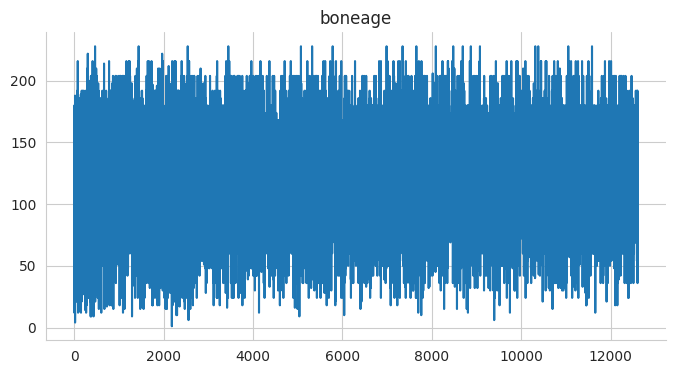

In [ ]:
from matplotlib import pyplot as plt

# Assuming 'df' is your original DataFrame
df['boneage'].plot(kind='line', figsize=(8, 4), title='boneage')  # Replace _df_7 with df
plt.gca().spines[['top', 'right']].set_visible(False)

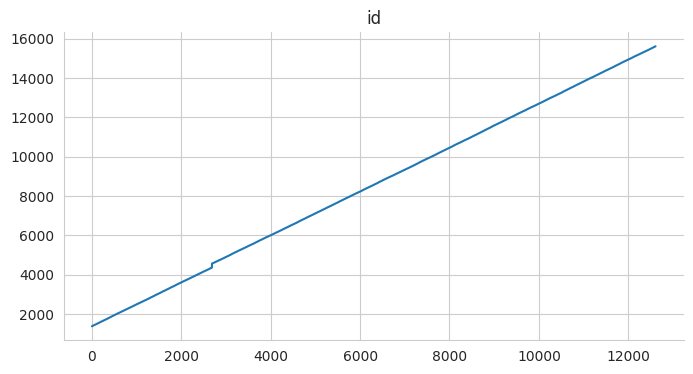

In [ ]:
from matplotlib import pyplot as plt
# Assuming 'df' is your DataFrame from the previous cell
df['id'].plot(kind='line', figsize=(8, 4), title='id') # Use 'df' instead of '_df_6'
plt.gca().spines[['top', 'right']].set_visible(False)

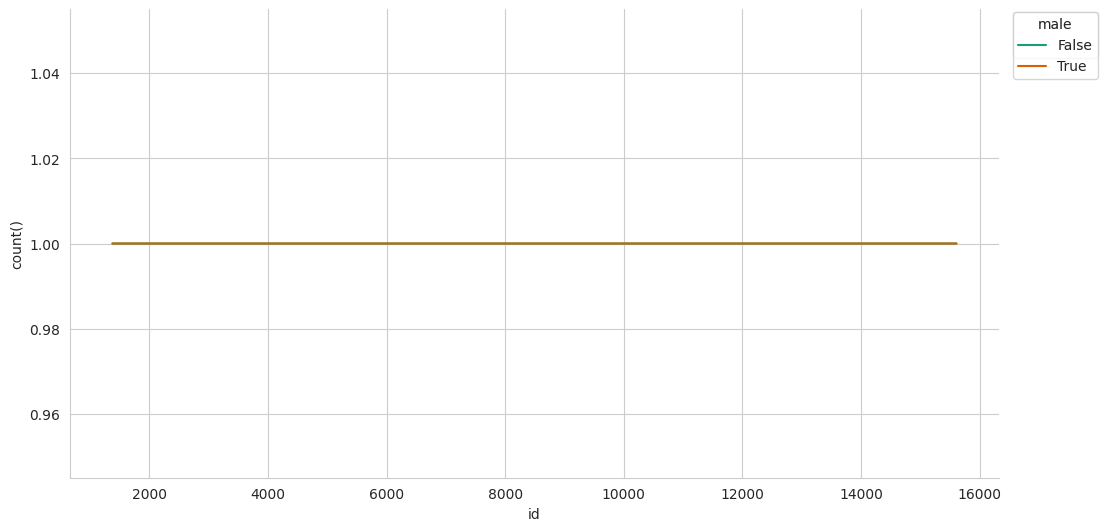

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
# Replacing _df_5 with df, assuming df is your DataFrame
df_sorted = df.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('male')):
  _plot_series(series, series_name, i)
  fig.legend(title='male', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

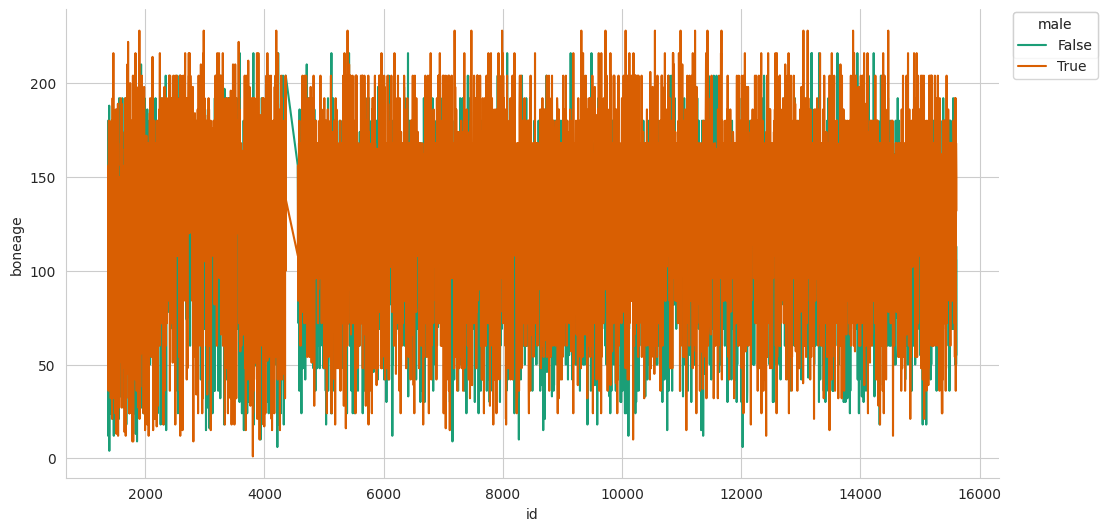

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['boneage']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
# Replacing _df_4 with df, assuming 'df' contains your data
df_sorted = df.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('male')):
  _plot_series(series, series_name, i)
  fig.legend(title='male', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('boneage')

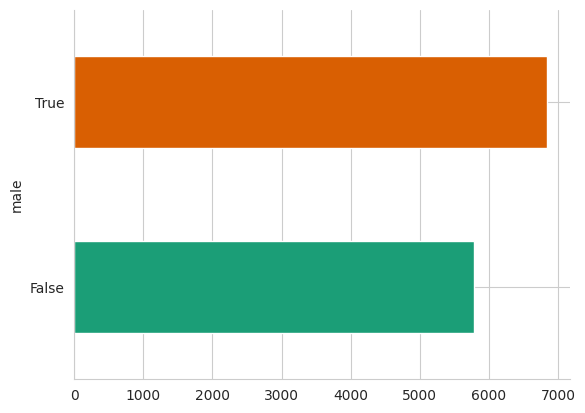

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
# Assuming 'df' is your DataFrame, replace '_df_2' with 'df'
df.groupby('male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

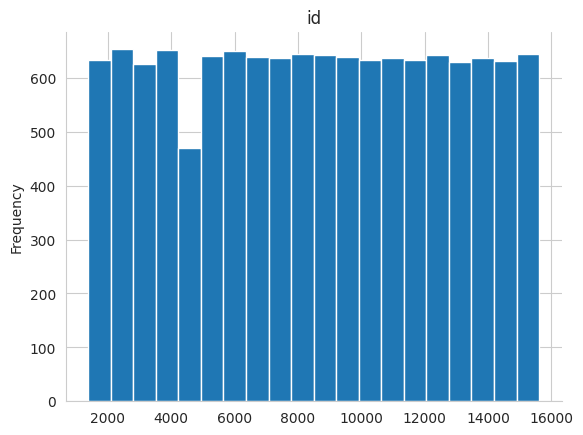

In [ ]:
from matplotlib import pyplot as plt
df['id'].plot(kind='hist', bins=20, title='id') # Changed _df_0 to df
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Shape
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Data types and missing values
df.info()

# Summary statistics
df.describe()


Dataset has 12611 rows and 3 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12611 entries, 0 to 12610
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       12611 non-null  int64
 1   boneage  12611 non-null  int64
 2   male     12611 non-null  bool 
dtypes: bool(1), int64(2)
memory usage: 209.5 KB


,id,boneage
count,12611.000000,12611.000000
mean,8537.653001,127.320752
std,4108.763993,41.182021
min,1377.000000,1.000000
25%,5074.500000,96.000000
50%,8565.000000,132.000000
75%,12091.500000,156.000000
max,15610.000000,228.000000


id         0
boneage    0
male       0
dtype: int64


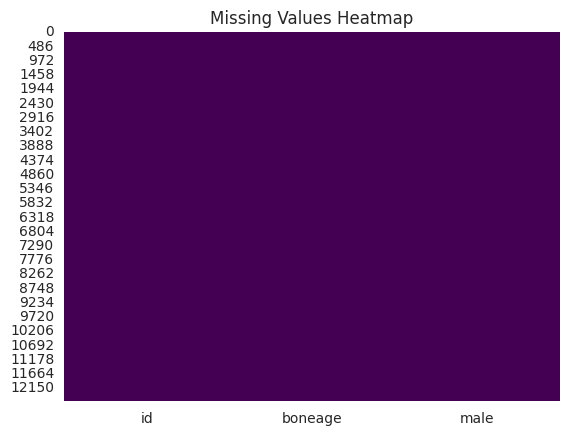

In [ ]:
# Missing values check
print(df.isnull().sum())

# Visualizing missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


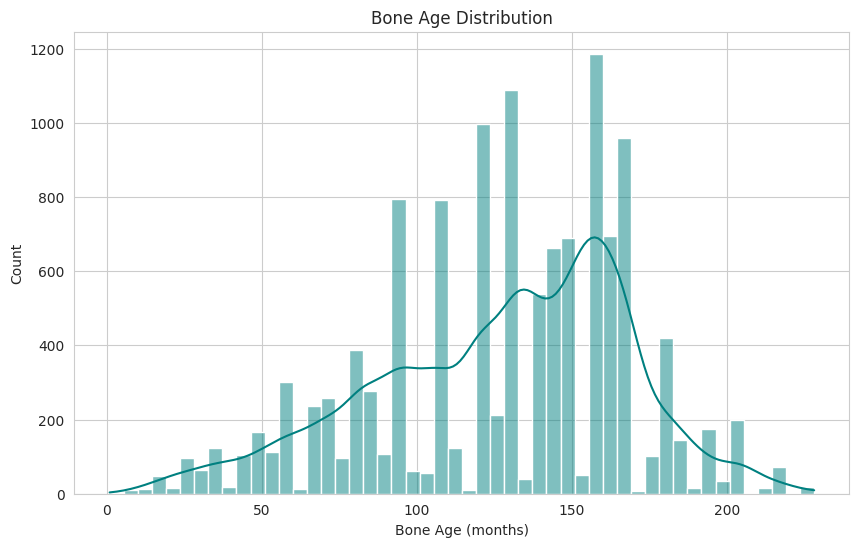

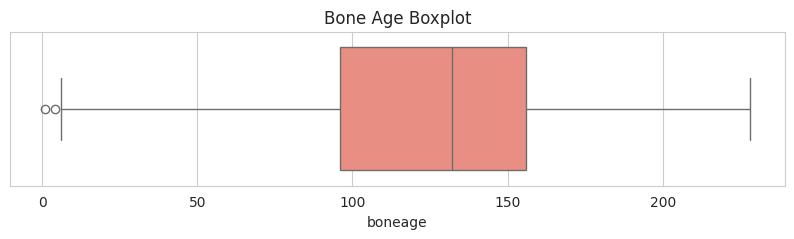

In [ ]:
# Histogram of bone age
plt.figure(figsize=(10,6))
sns.histplot(df['boneage'], bins=50, kde=True, color='teal')
plt.title('Bone Age Distribution')
plt.xlabel('Bone Age (months)')
plt.ylabel('Count')
plt.show()

# Boxplot
plt.figure(figsize=(10,2))
sns.boxplot(x='boneage', data=df, color='salmon')
plt.title('Bone Age Boxplot')
plt.show()


In [ ]:
# Assuming you have a 'gender' column: ('Male', 'Female')
if 'gender' in df.columns:
    # Count plot
    sns.countplot(x='gender', data=df, palette='Set2')
    plt.title('Gender Distribution')
    plt.show()

    # Bone age by gender
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x='boneage', hue='gender', kde=True, element='step', stat="density", common_norm=False)
    plt.title('Bone Age Distribution by Gender')
    plt.show()

    # Average bone age per gender
    print(df.groupby('gender')['boneage'].mean())


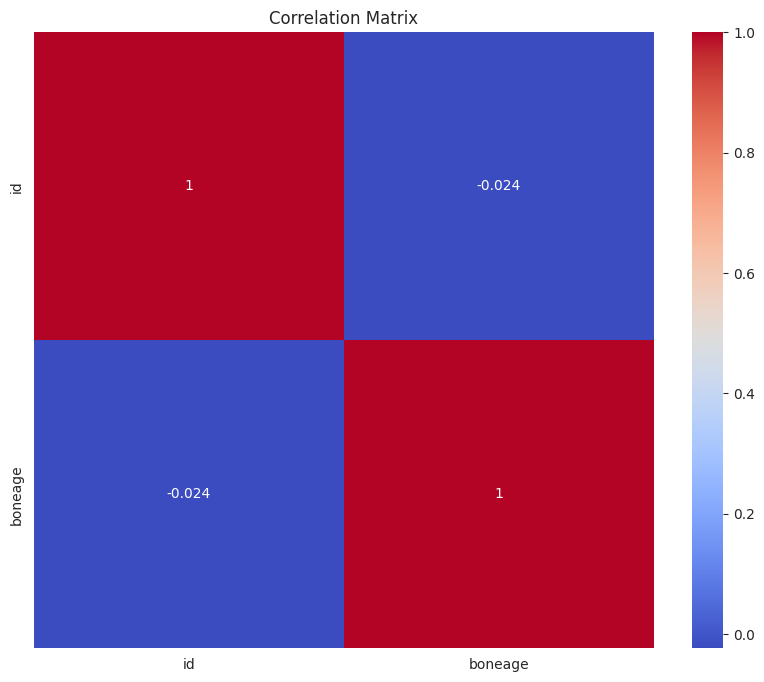

In [ ]:
# Only numerical features
numeric_features = df.select_dtypes(include=[np.number])

# Correlation matrix
corr = numeric_features.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


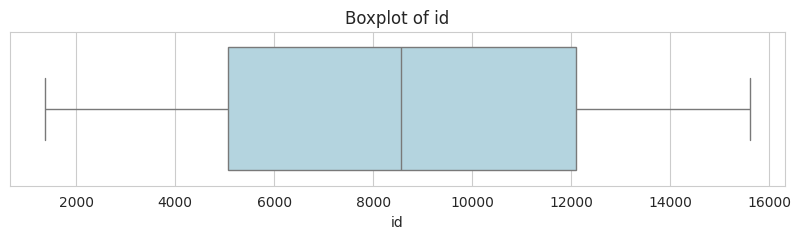

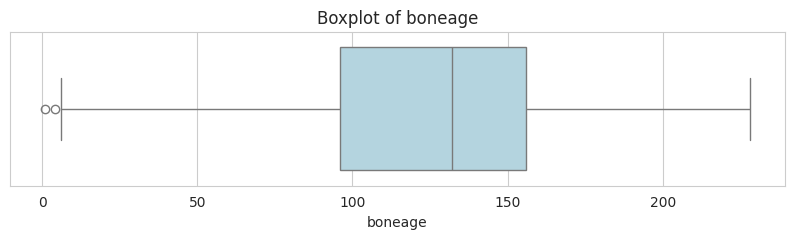

In [ ]:
# Let's see outliers using boxplots
for col in numeric_features.columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
    plt.show()


In [ ]:
# If you want interactive plots
# Replace 'gender' with 'male' if that's your column name
fig = px.histogram(df, x='boneage', color='male', marginal="box", nbins=40, title="Bone Age by Gender")
fig.show()

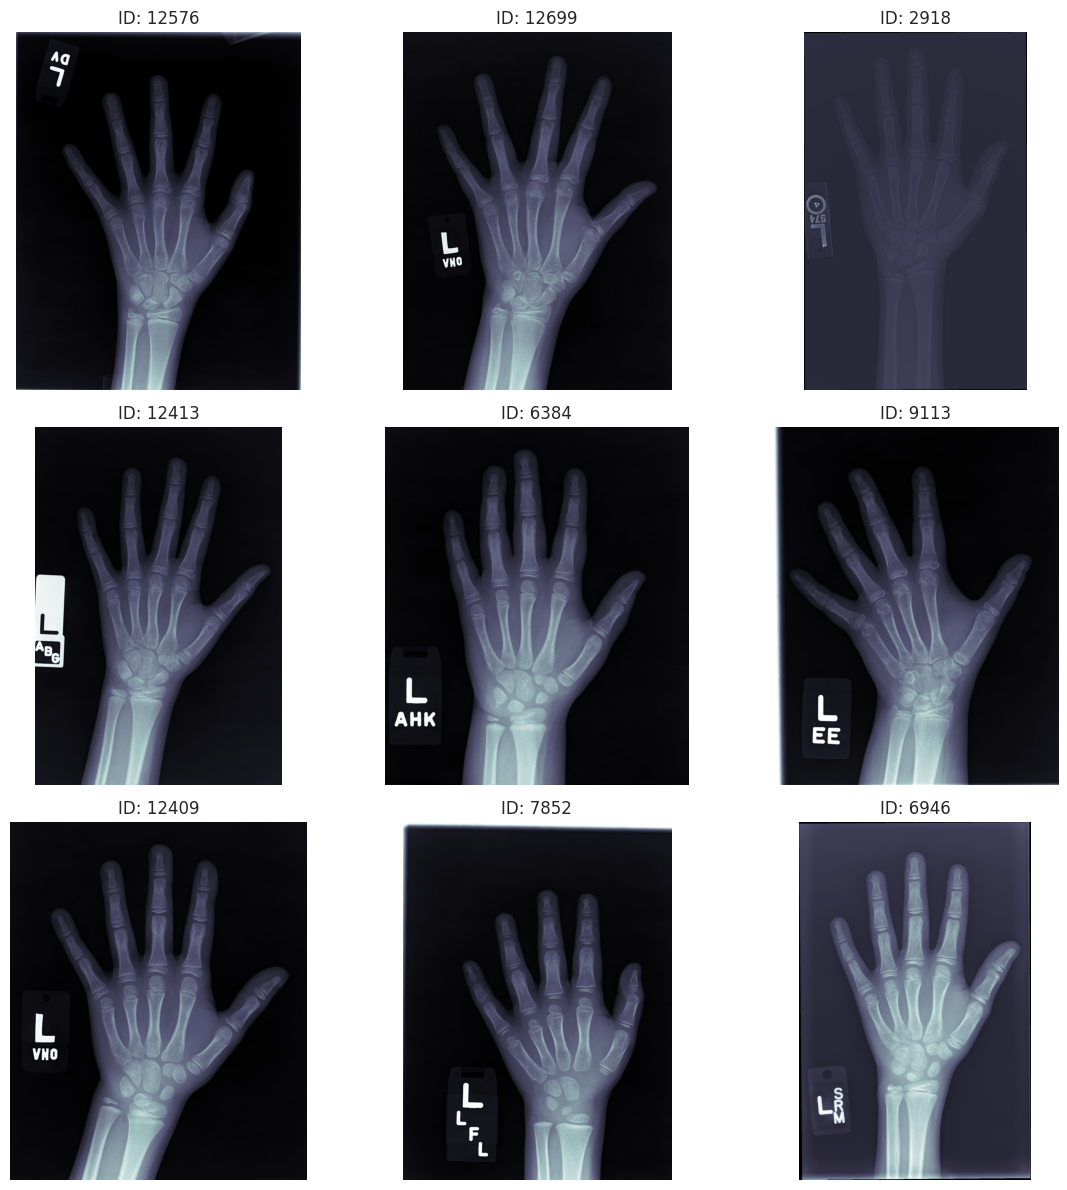

In [ ]:
import cv2
import random
from matplotlib import pyplot as plt

# Check the column name — assuming it's 'id' or 'filename'
# And images are stored in a folder like 'boneage-training-dataset/images/'

IMAGE_FOLDER = '/content/drive/MyDrive/dataset/boneage-training-dataset/boneage-training-dataset/'  # update if different, ensure trailing slash
# make sure your path ends with a '/'

# Randomly sample few images
sample_images = random.sample(list(df['id']), 9)

plt.figure(figsize=(12,12))
for idx, img_id in enumerate(sample_images):
    img_path = IMAGE_FOLDER + str(img_id) + '.png'  # or .jpg, depending on your dataset

    # Check if the file exists before reading
    import os
    if not os.path.exists(img_path):
        print(f"Warning: Image file not found: {img_path}")
        continue  # Skip to the next image

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # grayscale

    # Check if image was loaded successfully
    if img is None:
        print(f"Warning: Failed to load image: {img_path}")
        continue

    plt.subplot(3,3,idx+1)
    plt.imshow(img, cmap='bone')
    plt.title(f"ID: {img_id}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:

# Install and Import necessary libraries
!pip install -q tensorflow pandas matplotlib scikit-learn

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [ ]:
# ============================================
# 1. Load Dataset
# ============================================

# Assuming you have a CSV file like:
# | id | boneage | gender |
# |----|---------|--------|
# and images stored in '/content/images/'



# Example path
csv_path = '/content/drive/MyDrive/dataset/boneage-training-dataset.csv'
img_dir = '/content/drive/MyDrive/dataset/boneage-training-dataset/boneage-training-dataset'

# Load CSV
df = pd.read_csv(csv_path)
df['id'] = df['id'].astype(str) + '.png'   # Add .png extension

print(df.head())


         id  boneage   male
0  1377.png      180  False
1  1378.png       12  False
2  1379.png       94  False
3  1380.png      120   True
4  1381.png       82  False


In [ ]:
# ============================================
# 2. Preprocessing
# ============================================

# Normalize labels (optional, depends on target distribution)
boneage_mean = df['boneage'].mean()
boneage_std = df['boneage'].std()
df['boneage_zscore'] = (df['boneage'] - boneage_mean) / boneage_std

# Train/Val Split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training samples: {len(train_df)}, Validation samples: {len(val_df)}")


Training samples: 10088, Validation samples: 2523


In [ ]:
# ============================================
# 3. Data Generators
# ============================================

# Image parameters
IMG_SIZE = 224

# Training Data Generator with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Validation Data Generator (only rescale)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=img_dir,
    x_col='id',
    y_col='boneage_zscore',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='raw'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=img_dir,
    x_col='id',
    y_col='boneage_zscore',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='raw'
)


Found 10088 validated image filenames.
Found 2523 validated image filenames.


In [ ]:
# ============================================
# 4. Model Building
# ============================================

# Simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    GlobalAveragePooling2D(),

    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(1)  # Output: Single value (bone age z-score)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,465 (400.25 KB)

 Trainable params: 102,017 (398.50 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# ============================================
# 5. Callbacks
# ============================================

# Create a directory to save models
checkpoint_dir = '/content/drive/MyDrive/checkpoints/'
os.makedirs(checkpoint_dir, exist_ok=True)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath=os.path.join(checkpoint_dir, 'boneage_best_model.h5'),
                    monitor='val_loss',
                    save_best_only=True)
]


In [9]:
# ============================================
# 6. Train the model
# ============================================

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=6,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - loss: 1.0653 - mae: 0.8281 

316/316 ━━━━━━━━━━━━━━━━━━━━ 4705s 15s/step - loss: 1.0651 - mae: 0.8280 - val_loss: 1.0428 - val_mae: 0.8288
Epoch 2/6
316/316 ━━━━━━━━━━━━━━━━━━━━ 1581s 5s/step - loss: 0.9054 - mae: 0.7689 - val_loss: 4.0116 - val_mae: 1.6888
Epoch 3/6
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 0.8824 - mae: 0.7578

316/316 ━━━━━━━━━━━━━━━━━━━━ 1604s 5s/step - loss: 0.8824 - mae: 0.7578 - val_loss: 0.8639 - val_mae: 0.7618
Epoch 4/6
316/316 ━━━━━━━━━━━━━━━━━━━━ 1630s 5s/step - loss: 0.8115 - mae: 0.7230 - val_loss: 1.2646 - val_mae: 0.9090
Epoch 5/6
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 0.7842 - mae: 0.7135

316/316 ━━━━━━━━━━━━━━━━━━━━ 1639s 5s/step - loss: 0.7841 - mae: 0.7135 - val_loss: 0.7391 - val_mae: 0.6757
Epoch 6/6
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 0.7311 - mae: 0.6811

316/316 ━━━━━━━━━━━━━━━━━━━━ 1633s 5s/step - loss: 0.7311 - mae: 0.6811 - val_loss: 0.6067 - val_mae: 0.6111


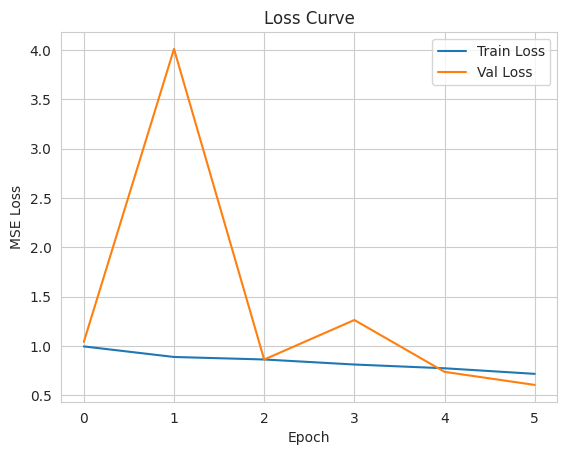

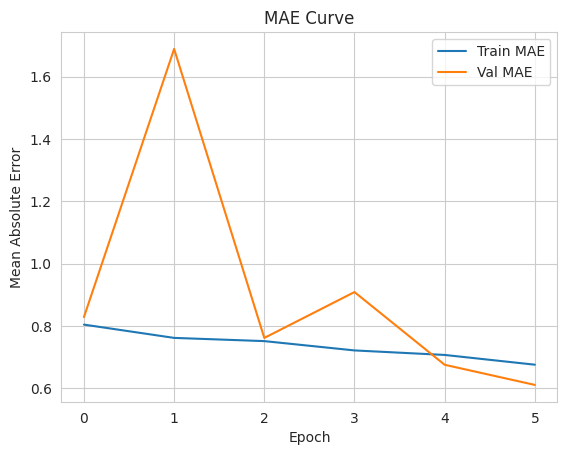

In [10]:
# ============================================
# 7. Plotting Training Curves
# ============================================

# Loss Curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

# MAE Curve
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend()
plt.title('MAE Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.show()


In [11]:
# ============================================
# 8. Save Final Model
# ============================================

final_model_path = '/content/drive/MyDrive/final_boneage_model.h5'
model.save(final_model_path)
print(f"Model saved at {final_model_path}")


Model saved at /content/drive/MyDrive/final_boneage_model.h5


In [12]:
# ============================================
# 9. Inference - Predict Bone Age from Image
# ============================================

from tensorflow.keras.preprocessing import image

def predict_bone_age(img_path, model, mean, std):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    pred_boneage = pred[0][0] * std + mean  # De-normalize
    return pred_boneage

# Example:
sample_img = val_df.iloc[0]['id']
sample_img_path = os.path.join(img_dir, sample_img)

predicted_bone_age = predict_bone_age(sample_img_path, model, boneage_mean, boneage_std)
print(f"Predicted Bone Age: {predicted_bone_age:.2f} months")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
Predicted Bone Age: 110.97 months


In [13]:
# ============================================
# Upgraded Model: Using EfficientNetB0
# ============================================

# Import
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Load the EfficientNetB0 base model
base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# Freeze the base model
base_model.trainable = False

# Create the full model
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1)(x)  # Regression output

efficient_model = Model(inputs, outputs)

# Compile
efficient_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

efficient_model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [14]:
# ============================================
# Train the EfficientNet Model
# ============================================

# Ensure 'checkpoint_dir' is defined
checkpoint_dir = '/content/drive/MyDrive/checkpoints/'  # Or your preferred path
os.makedirs(checkpoint_dir, exist_ok=True)

efficient_callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath=os.path.join(checkpoint_dir, 'efficientnet_boneage_best_model.h5'),
                    monitor='val_loss',
                    save_best_only=True)
]

efficient_history = efficient_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=efficient_callbacks
)

Epoch 1/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.0246 - mae: 0.8204

316/316 ━━━━━━━━━━━━━━━━━━━━ 1343s 4s/step - loss: 1.0246 - mae: 0.8204 - val_loss: 1.0444 - val_mae: 0.8371
Epoch 2/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1284s 4s/step - loss: 1.0027 - mae: 0.8127 - val_loss: 1.0446 - val_mae: 0.8380
Epoch 3/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1335s 4s/step - loss: 0.9908 - mae: 0.8152 - val_loss: 1.0446 - val_mae: 0.8381
Epoch 4/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1310s 4s/step - loss: 1.0237 - mae: 0.8257 - val_loss: 1.0446 - val_mae: 0.8380
Epoch 5/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1280s 4s/step - loss: 1.0178 - mae: 0.8236 - val_loss: 1.0446 - val_mae: 0.8381
Epoch 6/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1286s 4s/step - loss: 1.0056 - mae: 0.8172 - val_loss: 1.0446 - val_mae: 0.8382


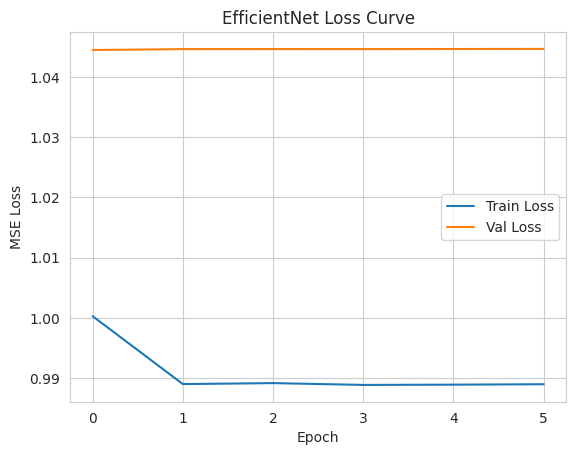

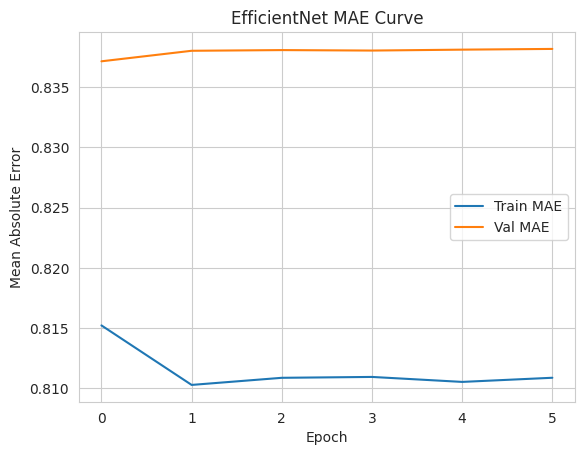

In [15]:
# ============================================
# Plotting Curves for EfficientNet
# ============================================

# Loss
plt.plot(efficient_history.history['loss'], label='Train Loss')
plt.plot(efficient_history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('EfficientNet Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

# MAE
plt.plot(efficient_history.history['mae'], label='Train MAE')
plt.plot(efficient_history.history['val_mae'], label='Val MAE')
plt.legend()
plt.title('EfficientNet MAE Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.show()


In [16]:
# ============================================
# Save Final EfficientNet Model
# ============================================

final_efficientnet_model_path = '/content/drive/MyDrive/final_efficientnet_boneage_model.h5'
efficient_model.save(final_efficientnet_model_path)
print(f"EfficientNet model saved at {final_efficientnet_model_path}")


EfficientNet model saved at /content/drive/MyDrive/final_efficientnet_boneage_model.h5


In [17]:
# ============================================
# Predict Bone Age with EfficientNet Model
# ============================================

predicted_bone_age_eff = predict_bone_age(sample_img_path, efficient_model, boneage_mean, boneage_std)
print(f"[EfficientNetB0] Predicted Bone Age: {predicted_bone_age_eff:.2f} months")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[EfficientNetB0] Predicted Bone Age: 127.50 months


In [18]:
# ============================================
# Install Gradio
# ============================================
!pip install -q gradio
import gradio as gr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.2 MB/s eta 0:00:00


In [19]:
# ============================================
# Define Prediction Function
# ============================================

def gradio_predict(img):
    img = img.resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = efficient_model.predict(img_array)
    pred_boneage = pred[0][0] * boneage_std + boneage_mean  # De-normalize
    return f"Predicted Bone Age: {pred_boneage:.2f} months"


In [ ]:
# ============================================
# Build Gradio Interface
# ============================================

# Create an interface
interface = gr.Interface(
    fn=gradio_predict,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Bone Age Prediction System",
    description="Upload a hand X-ray image to predict bone age (in months)!"
)

# Launch the app
interface.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://2ac342d283fcc66e4b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
